<a href="https://colab.research.google.com/github/yagnik99/Funds-Prediction-for-a-Startup/blob/main/Yagnik_Pandya_Capstone_Project_4_Startup_Funding_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predict whether a startup will get funded in the next three months. </u></b>

## <b> Problem Description </b>

### There has been a staggering growth in investments in young age startups in the last 5 years. A lot of big VC firms are increasingly getting interested in the startup funding space. You are given a task to predict whether a startup will get a funding in the next three months using app traction data and startup details. 

### This funding can be either seed funding, Series A, Series B, so on and so forth. 


## <b> Data Description </b>

### In the file, you have monthly data for the startup entities which contains information about various app traction performance.

### <b> In the given data, you have the following variables:
* ### UUID - Unique Identifier for a single startup entity
* ### Month - Month for which the app data is available
* ### Application category - The category to which an application belongs to
* ### Avg Session Time - Average time of the session in app during the month
* ### Total Session Time - Avg session time / user x Open rate = Total session time
* ### Open_rate - No of times app has been opened by a user
* ### Reach - % of devices having the app installed
* ### Funding_ind - Indicator for a funded startup

## <b>Following variables are only available for funded startups:</b>
* ### Business models -  The business model of the startup                            
* ### City - the city where the startup is based out of
* ### Company Stage - the stage of the company
* ### Feed name - 
* ### Founded year - The year in which the startup was founded
* ### Latest funded date - The latest date in which the startup was funded
* ### MAU - % of reach which opened the app in the given month( Monthly Active Users)
* ### Overview - Overview of the startup
* ### Practice Areas - 
* ### Region - Region where the startup operates
* ### Total Funding - Total amount of funding till the month
* ### Uninstall Rate - Rate of uninstall of applications.



In [2]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
folder = '/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 4/Capstone Project 4/data/'

In [ ]:
O_data = pd.read_csv(folder + 'data_driven_investment_1.csv')

In [ ]:
O_data.head(3)

UUID  ...  funding_ind
0  c1ad38e2d357610c129657d870ede902e8abfcb9  ...            0
1  d841e670d9191f896a0cbc75961920887b375756  ...            0
2  0a59d138b3eaccd22b665eae70c756fef83ddb63  ...            0

[3 rows x 20 columns]

In [ ]:
# Shape of Original Dataset
O_data.shape

(1502175, 20)

In [ ]:
O_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502175 entries, 0 to 1502174
Data columns (total 20 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   UUID                  1500693 non-null  object 
 1   month                 1502175 non-null  int64  
 2   Application Category  1502175 non-null  object 
 3   Avg_Session_Time      877732 non-null   float64
 4   Business Models       2414 non-null     object 
 5   City                  2407 non-null     object 
 6   Company Stage         2414 non-null     object 
 7   Feed Name             2414 non-null     object 
 8   Founded Year          2414 non-null     float64
 9   Latest Funded Date    2414 non-null     object 
 10  MAU                   118087 non-null   float64
 11  Open_Rate             877715 non-null   float64
 12  Overview              2414 non-null     object 
 13  Practice Areas        2414 non-null     object 
 14  Reach                 1050875 non-

In [ ]:
#Count of Funded Startups
O_data['funding_ind'].value_counts()

0    1499761
1       2414
Name: funding_ind, dtype: int64

In [ ]:
# Checking for duplicates
len(O_data[O_data.duplicated()])

89412

In [ ]:
#Droping Duplicates
O_data.drop_duplicates(inplace=True)

In [ ]:
O_data.isna().sum()

UUID                        969
month                         0
Application Category          0
Avg_Session_Time         535031
Business Models         1410459
City                    1410466
Company Stage           1410459
Feed Name               1410459
Founded Year            1410459
Latest Funded Date      1410459
MAU                     1294676
Open_Rate                535048
Overview                1410459
Practice Areas          1410459
Reach                    451300
Region                        0
Total Funding (USD)     1410605
Total_Session_Time       535098
Uninstall_Rate          1060560
funding_ind                   0
dtype: int64

###Checking where there is no UUID and droping those if no funds recieved as it will be of no use. 

In [ ]:
# Where UUID is null
len(O_data[O_data['UUID'].isna()])

969

In [ ]:
# Subset of data where UUID is not null
O_data = O_data[O_data['UUID'].notna()]

In [ ]:
# Duration of Data
print(O_data['month'].min(),'- start')
print(O_data['month'].max(), '- end')

20180701 - start
20200601 - end


In [ ]:
# Copy of Data for future use
data = O_data.copy()

In [ ]:
# Features that are only for funded Start up
Funded_features = ['Business Models', 'City', 'Company Stage', 'Feed Name', 'Founded Year', 'Latest Funded Date', 'MAU', 'Overview', 'Practice Areas', 'Total Funding (USD)', 'Uninstall_Rate']

In [ ]:
data.drop(Funded_features, axis = 1, inplace=True)

In [ ]:
data.shape

(1411794, 9)

In [ ]:
data.isna().sum()

UUID                         0
month                        0
Application Category         0
Avg_Session_Time        534728
Open_Rate               534745
Reach                   450918
Region                       0
Total_Session_Time      534795
funding_ind                  0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1411794 entries, 0 to 1502174
Data columns (total 9 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   UUID                  1411794 non-null  object 
 1   month                 1411794 non-null  int64  
 2   Application Category  1411794 non-null  object 
 3   Avg_Session_Time      877066 non-null   float64
 4   Open_Rate             877049 non-null   float64
 5   Reach                 960876 non-null   float64
 6   Region                1411794 non-null  object 
 7   Total_Session_Time    876999 non-null   float64
 8   funding_ind           1411794 non-null  int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 107.7+ MB


### Many null values in above so will try to find out if there is any pattern of those missing values.

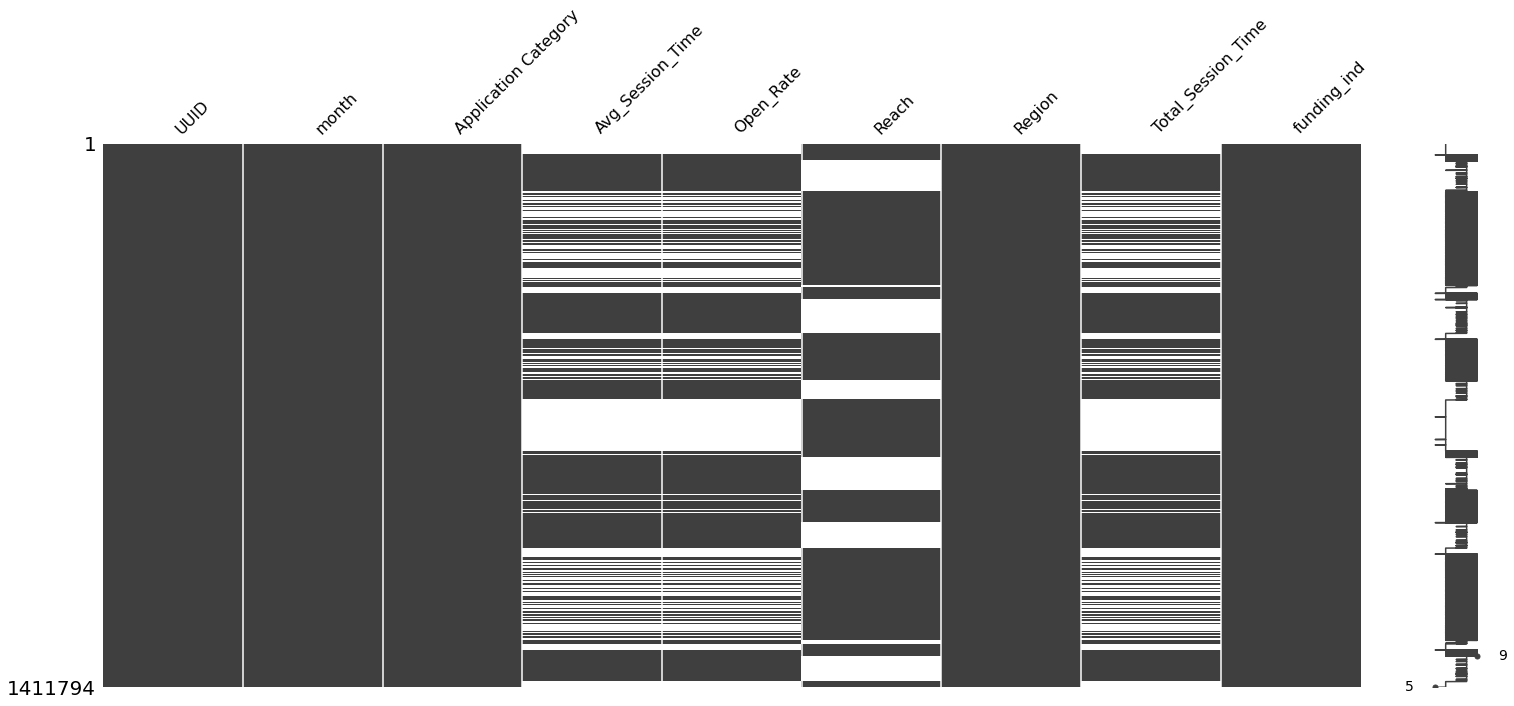

In [ ]:
# Identifying patter in missing values
import missingno as msno
msno.matrix(data)

In [ ]:
data['Year'] = data['month'].apply(lambda x : (int(str(x)[:4])))
data['Month'] = data['month'].apply(lambda x : (int(str(x)[4:6])))
#data['Day'] = data['month'].apply(lambda x : (int(str(x)[6:])))   - All are of 1st day of month

In [ ]:
data.drop(['Region'], axis=1, inplace = True)

In [ ]:
# Subset of funded statups for EDA
Funded = data[data['funding_ind']==1]

In [ ]:
# Subset of Non Funded startups for EDA
Non_funded = data[data['funding_ind']==0]

In [ ]:
# Impute missing values
def fill_missing(dataframe):
  new_data = pd.DataFrame(columns=dataframe.columns)              # First will impute missing values with forward and back fill.
  Category_list = dataframe['Application Category'].value_counts().index.to_list()
  years = dataframe['Year'].value_counts().index.to_list()
  for i in Category_list:
    temp = dataframe[dataframe['Application Category']==i]
    for y in years:
      temp1 = temp[temp['Year']==y]
      temp1.fillna(method='ffill', limit = 2, inplace = True)
      temp1.fillna(method='backfill', limit = 1, inplace = True)
      new_data = pd.concat([new_data, temp1])
  
  new_data_1 = pd.DataFrame(columns=dataframe.columns)            # Remaining imputed with mean of category and year.
  for i in Category_list:
    temp = new_data[new_data['Application Category']==i]
    for y in years:
      temp1 = temp[temp['Year']==y]
      temp1.fillna(temp1.mean(), inplace = True)
      new_data_1 = pd.concat([new_data_1, temp1])

  Final_data = pd.DataFrame(columns=dataframe.columns)            # Still remaining imputed with mean of whole category.
  for i in Category_list:
    temp = new_data_1[new_data_1['Application Category']==i]
    temp.fillna(temp.mean(), inplace = True)
    Final_data = pd.concat([Final_data, temp])

  return Final_data

In [ ]:
# Removing missing values in funded
Funded = fill_missing(Funded)

In [ ]:
# Removing missing values in Non funded
Non_funded = fill_missing(Non_funded)

In [ ]:
# Filling rest missing values with overall mean
Funded.fillna(Funded.mean(), inplace = True)

In [ ]:
Final_data = pd.concat([Funded, Non_funded])

In [ ]:
Final_data.shape

(1411794, 10)

In [ ]:
# Saving data sets for future easy use purpose
Final_data.to_csv(folder + 'Final_dataset.csv', index= False)
Funded.to_csv(folder + 'Funded_dataset.csv', index= False)
Non_funded.to_csv(folder + 'Non_funded_dataset.csv', index= False)

In [ ]:
# Importing saved DF
Funded_df = pd.read_csv(folder + 'Funded_dataset.csv')
Non_funded_df = pd.read_csv(folder + 'Non_funded_dataset.csv')

In [ ]:
Final_df = pd.read_csv(folder + 'Final_dataset.csv')

In [ ]:
Final_df.shape

(1411794, 10)

In [ ]:
Final_df.drop_duplicates(['UUID', 'month', 'Application Category', 'funding_ind'], inplace = True)

In [ ]:
Final_df.shape

(945184, 10)

In [ ]:
Funded_df = Final_df[Final_df['funding_ind']==1]
Non_funded_df = Final_df[Final_df['funding_ind']==0]

##**EDA**

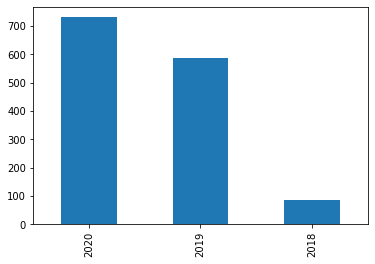

In [ ]:
#Trend of recieving funds
Funded_df['Year'].value_counts().plot(kind='bar')

In [ ]:
# Startups that has never recieved funds
never_funded = list(set(Non_funded_df['Application Category'].value_counts().index.to_list()) - set(Funded_df['Application Category'].value_counts().index.to_list()))
never_funded

['Art & Design',
 'Music',
 'Word',
 'Events',
 'Dating',
 'Casino',
 'Libraries & Demo']

Text(0.5, 1.0, 'Top 10 categories')

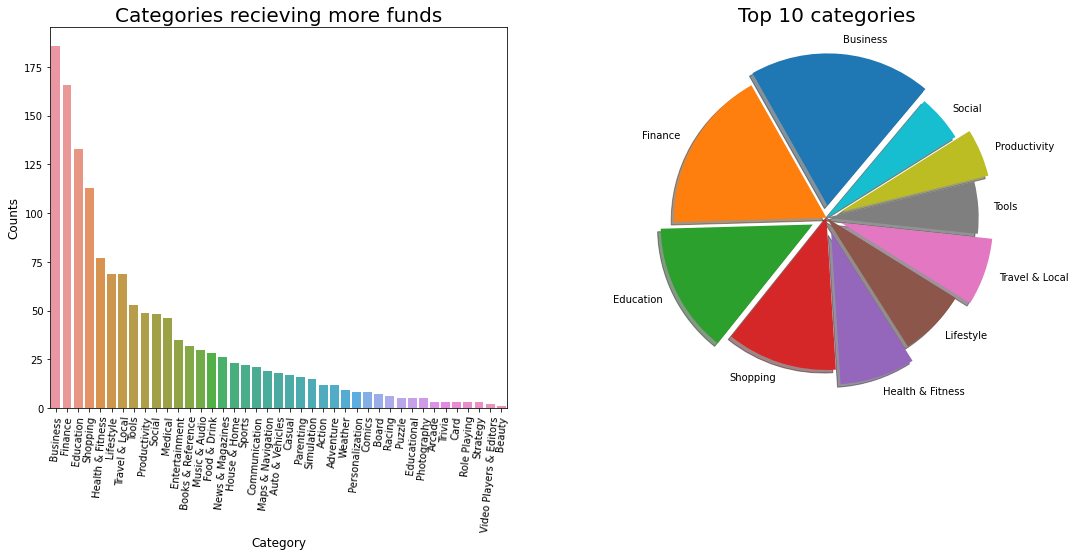

In [ ]:
# Category recieving more funds
plt.rcParams['figure.figsize'] = (18, 7)

a = pd.DataFrame(Funded_df['Application Category'].value_counts())
ax1 = plt.subplot(121)
sns.barplot(x=a.index, y= a['Application Category'] )
plt.xlabel('Category', fontsize = 12)
plt.xticks(rotation=85)
plt.ylabel('Counts', fontsize = 12)
ax1.set_title('Categories recieving more funds', fontsize = 20)

ax2 = plt.subplot(122)
explode =(0.08,0,0.1,0, 0.1,0,0.1,0, 0.1, 0)
plt.pie(a.sort_values(['Application Category'], ascending=False).head(10), labels=a.sort_values(['Application Category'], ascending=False).head(10).index, startangle=50, shadow = True, explode = explode)
ax2.set_title('Top 10 categories', fontsize = 20) 

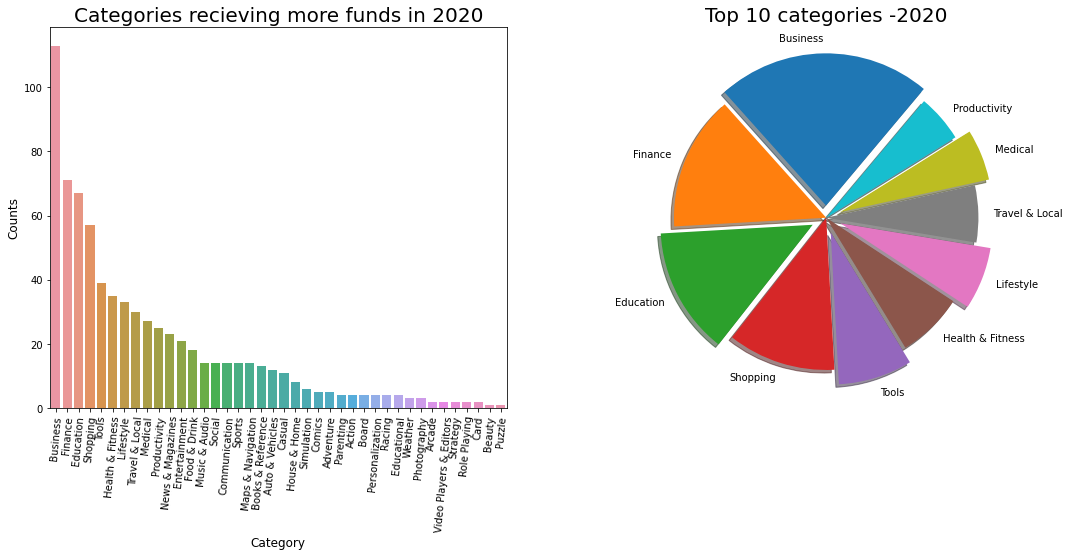

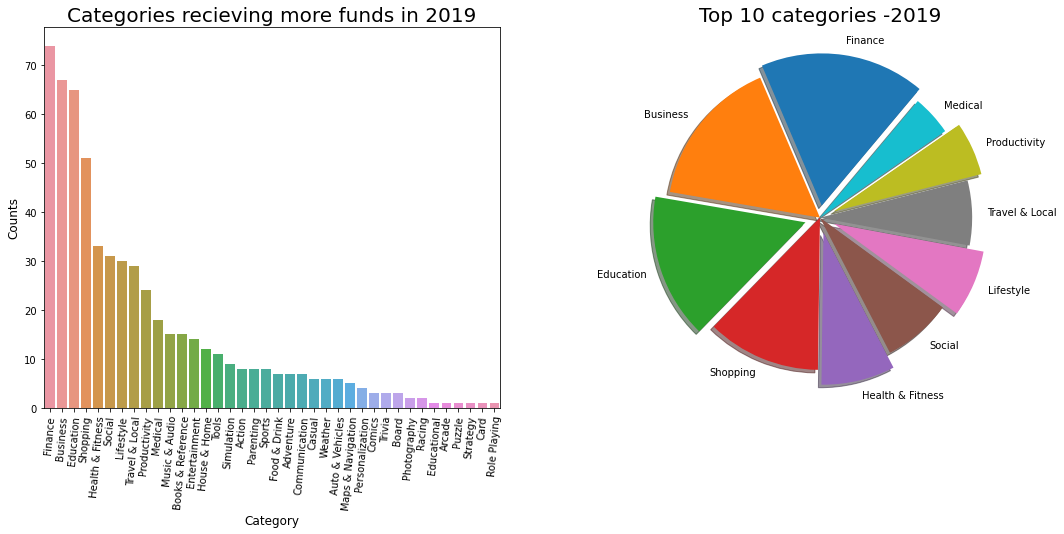

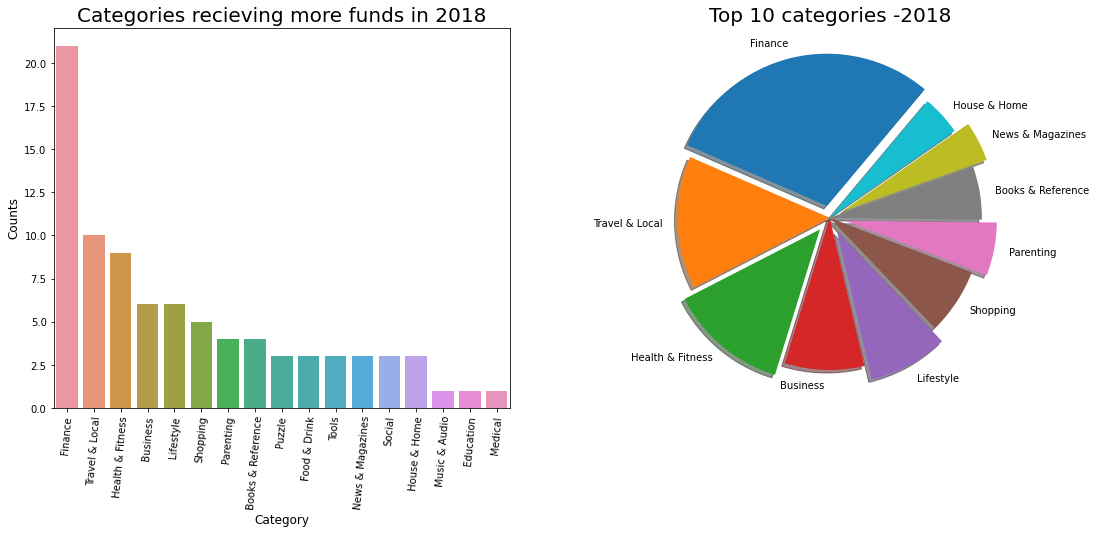

In [ ]:
# Trend of recieving funds over years for each category
years = Funded_df['Year'].value_counts().index.to_list()

plt.rcParams['figure.figsize'] = (18, 7)
for i in years:
  plt.figure()
  temp = Funded_df[Funded_df['Year']==i]
  a = pd.DataFrame(temp['Application Category'].value_counts())
  ax1 = plt.subplot(121)
  sns.barplot(x=a.index, y= a['Application Category'] )
  plt.xlabel('Category', fontsize = 12)
  plt.xticks(rotation=85)
  plt.ylabel('Counts', fontsize = 12)
  ax1.set_title('Categories recieving more funds in '+str(i), fontsize = 20)

  ax2 = plt.subplot(122)
  explode =(0.08,0,0.1,0, 0.1,0,0.1,0, 0.1, 0)
  plt.pie(a.sort_values(['Application Category'], ascending=False).head(10), labels=a.sort_values(['Application Category'], ascending=False).head(10).index, startangle=50, shadow = True, explode = explode)
  ax2.set_title('Top 10 categories -'+str(i), fontsize = 20) 

In [ ]:
# Numerical variables
numerical = ['Avg_Session_Time', 'Open_Rate', 'Reach', 'Total_Session_Time']

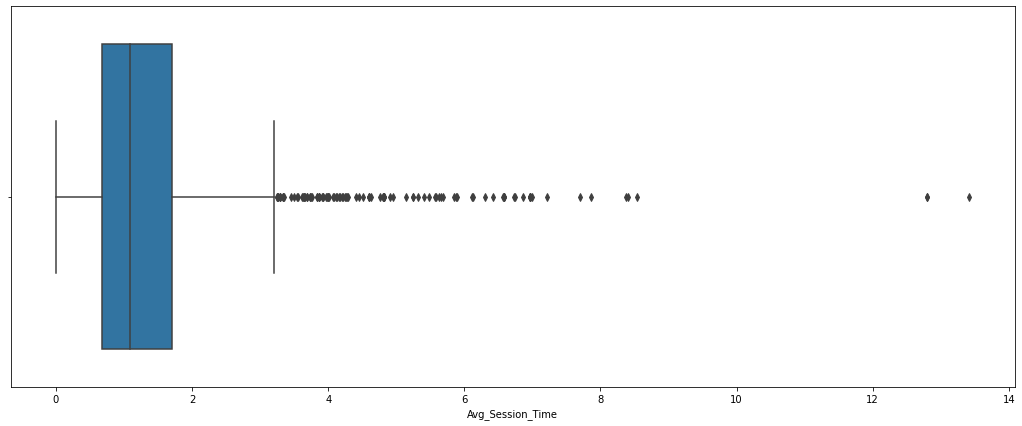

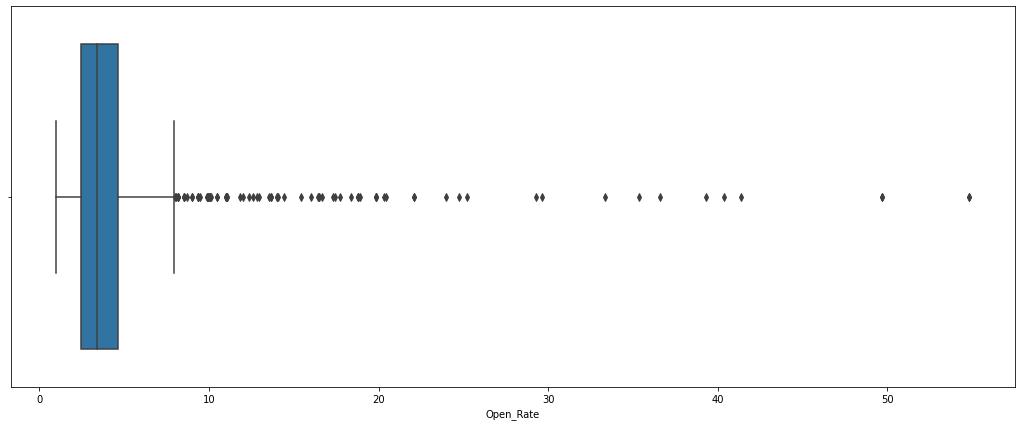

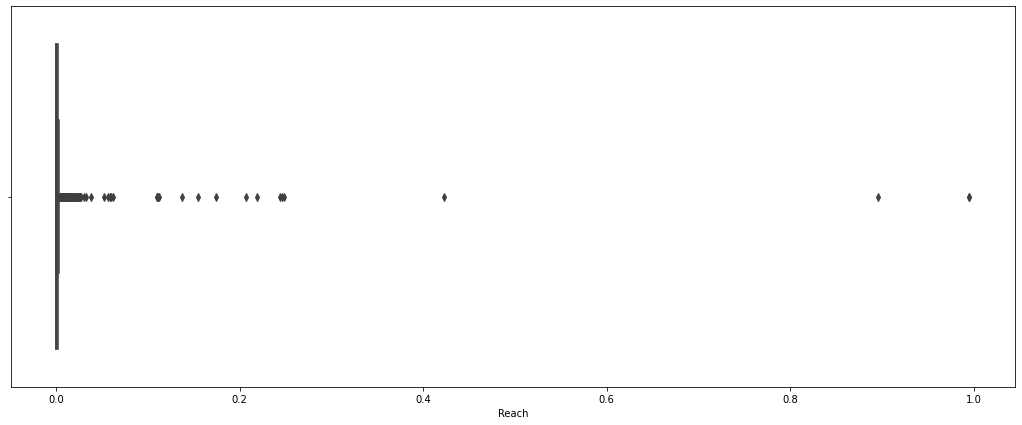

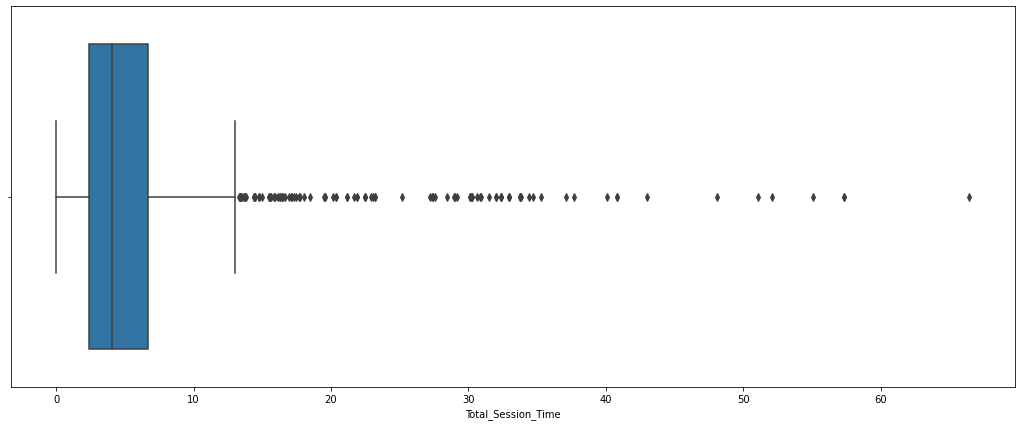

In [ ]:
for i in numerical:
  plt.figure()
  sns.boxplot(Funded_df[i])

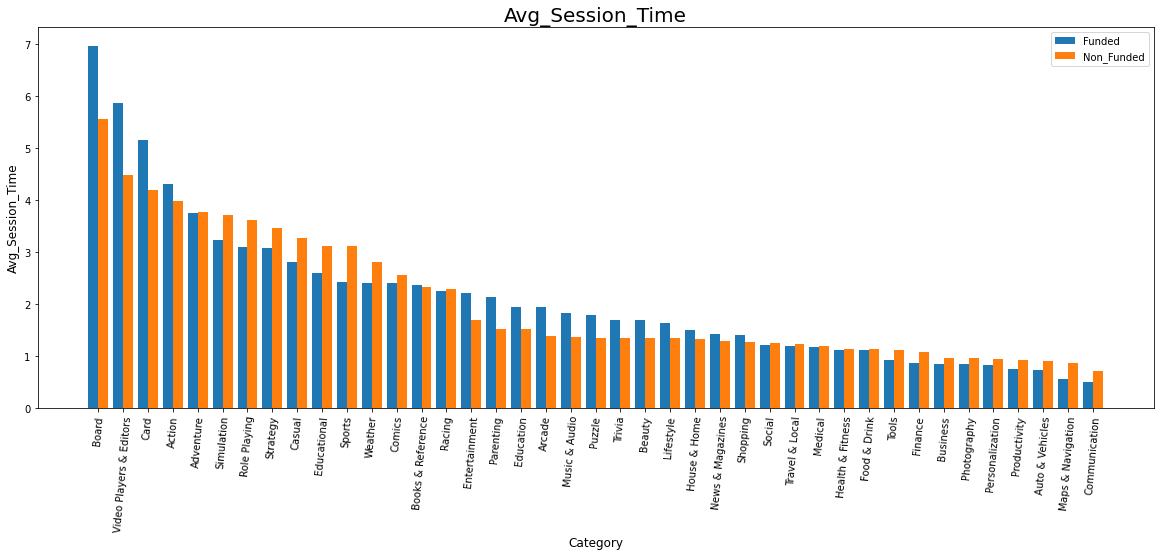

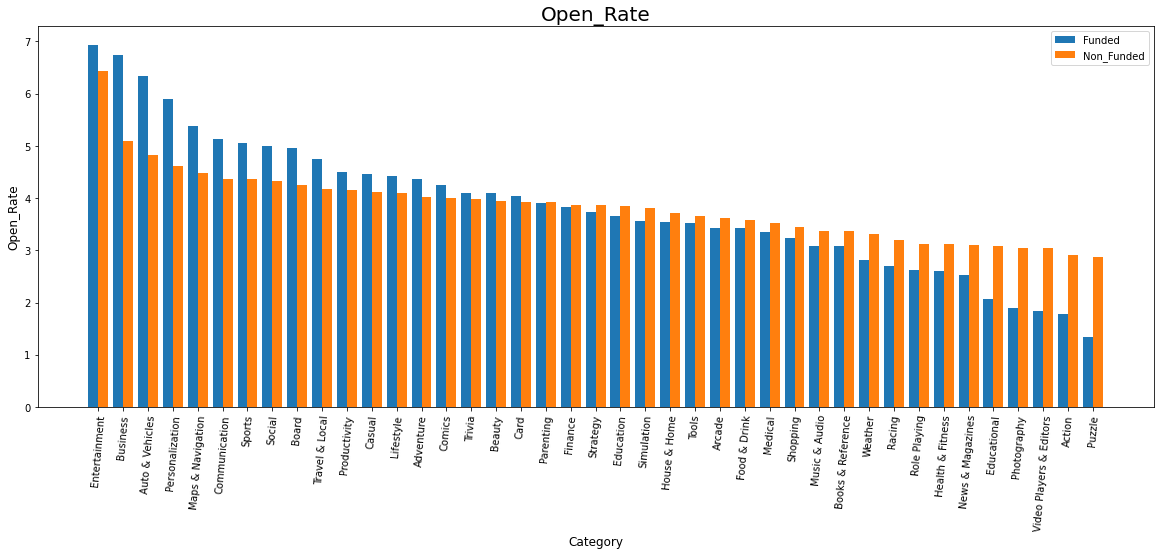

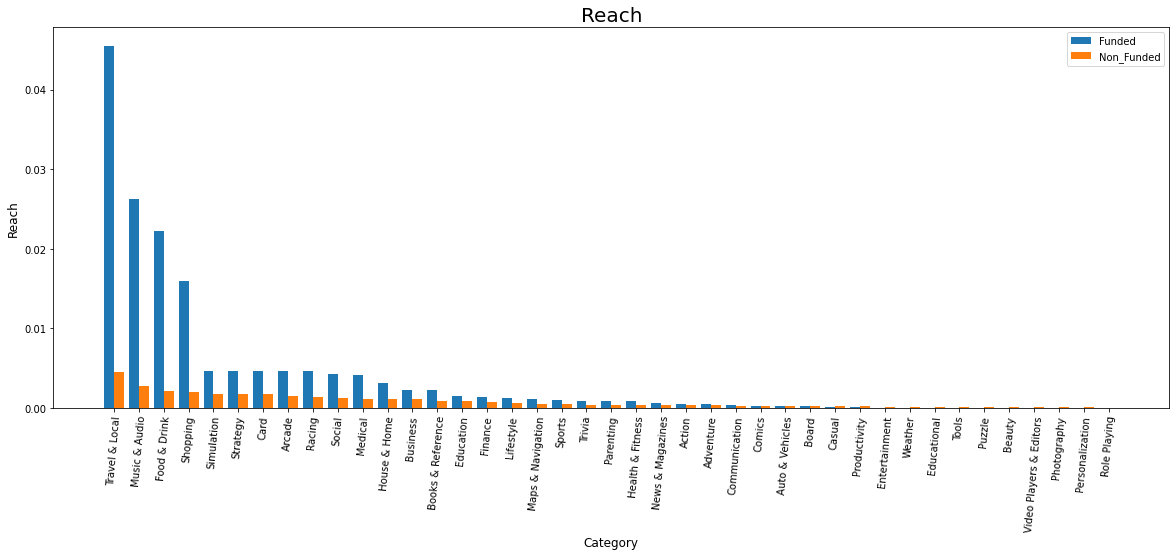

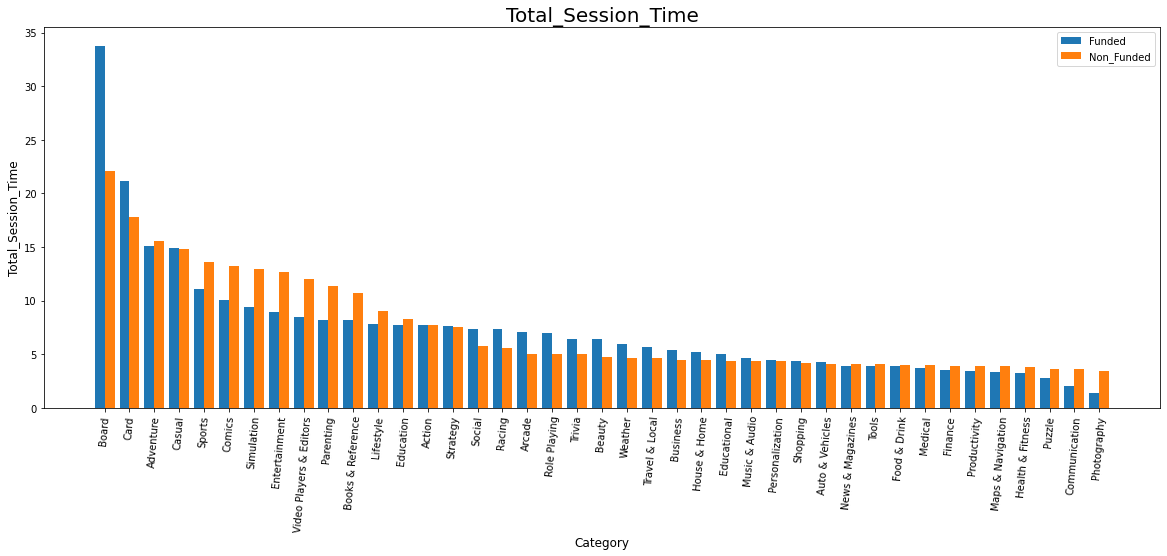

In [ ]:
plt.rcParams['figure.figsize'] = (20, 7)
for i in numerical:
  w=0.4
  temp = pd.DataFrame(Funded_df.groupby(['Application Category'])[i].mean())
  temp = temp.sort_values([i], ascending=False)
  temp2 = pd.DataFrame(Non_funded_df.groupby(['Application Category'])[i].mean())
  temp2 = temp2.sort_values([i], ascending=False)
  for j in never_funded:
    temp2.drop(j, inplace = True)

  bar1 = np.arange(len(temp.index))
  bar2 = [i+w for i in bar1]

  plt.bar(bar1, temp[i], w, label = 'Funded' )
  plt.bar(bar2, temp2[i], w, label = 'Non_Funded' )

  plt.xlabel('Category', fontsize = 12)
  plt.xticks(bar1+w/2, temp.index, rotation=85)
  plt.ylabel(i, fontsize = 12)
  plt.title(i, fontsize = 20)
  plt.legend()
  plt.show()

Not Funded in 2020 - ['Trivia', 'Art & Design', 'Music', 'Word', 'Events', 'Dating', 'Casino', 'Libraries & Demo']


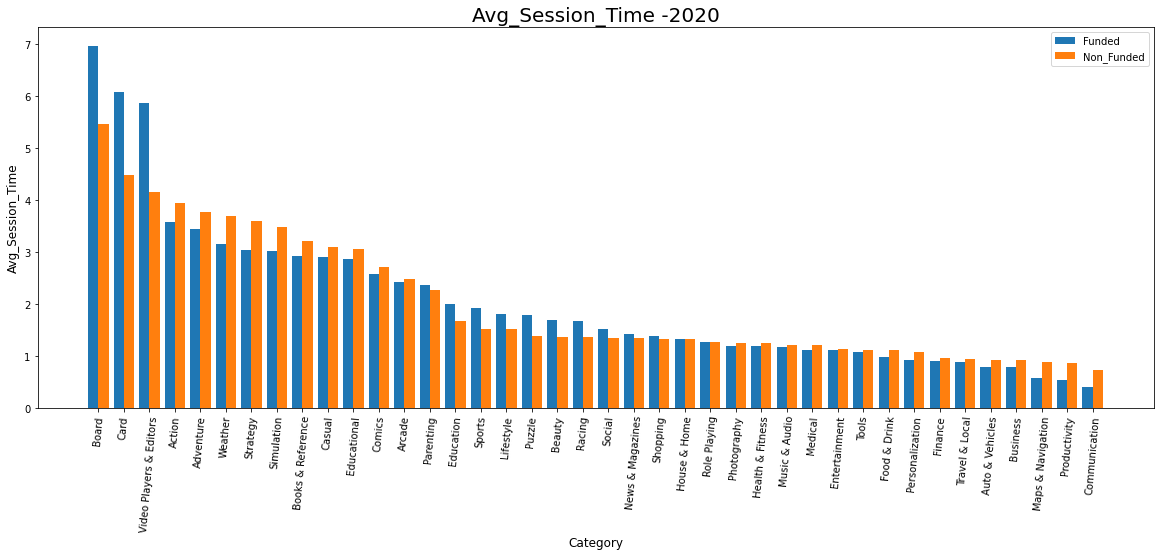

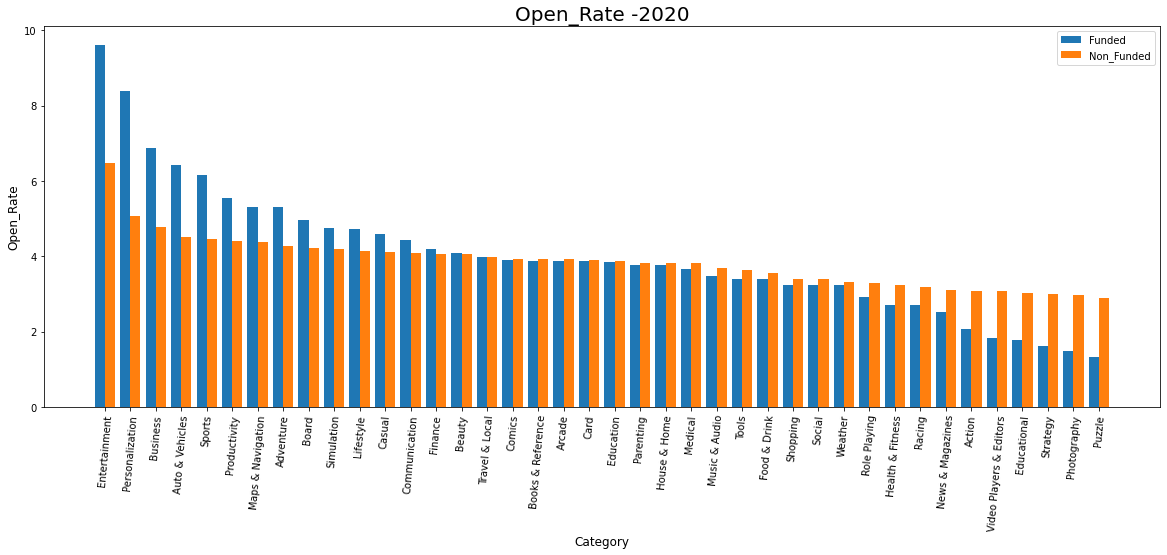

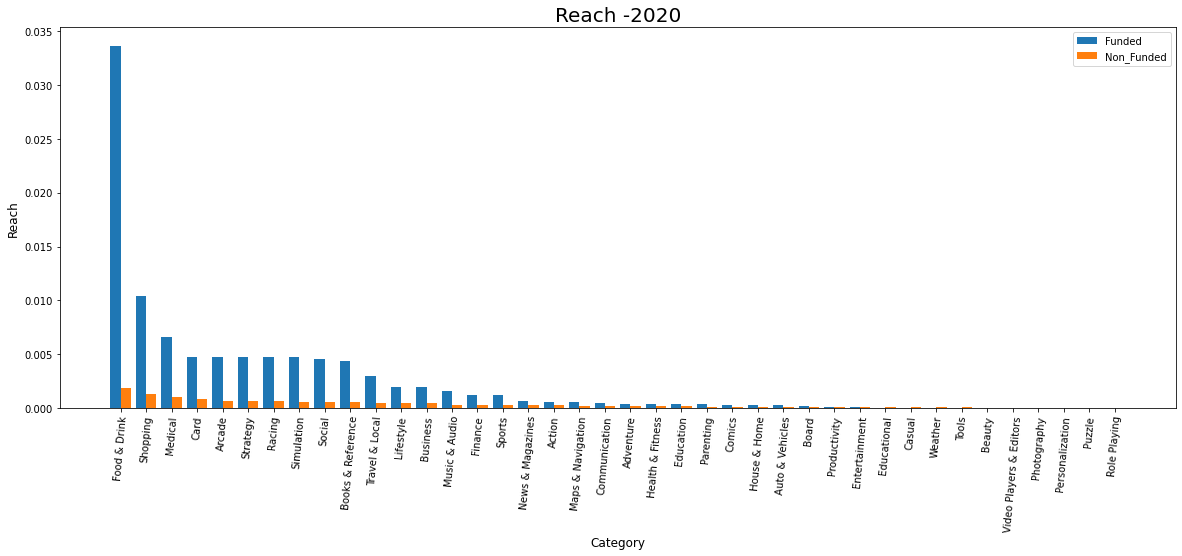

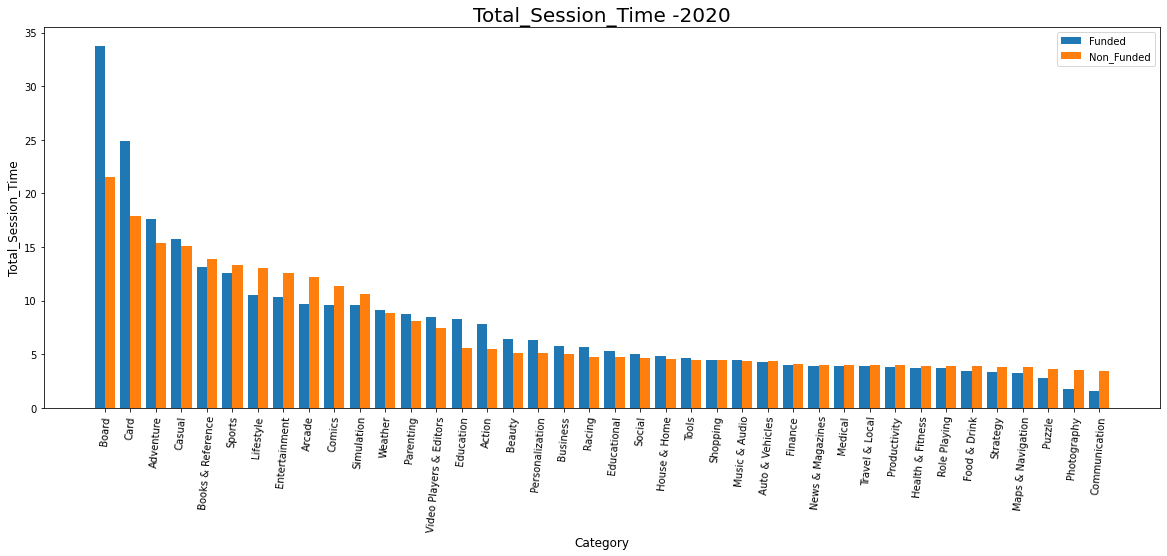

Not Funded in 2019 - ['Art & Design', 'Music', 'Word', 'Beauty', 'Events', 'News & Magazines', 'Video Players & Editors', 'Dating', 'Casino', 'Libraries & Demo']


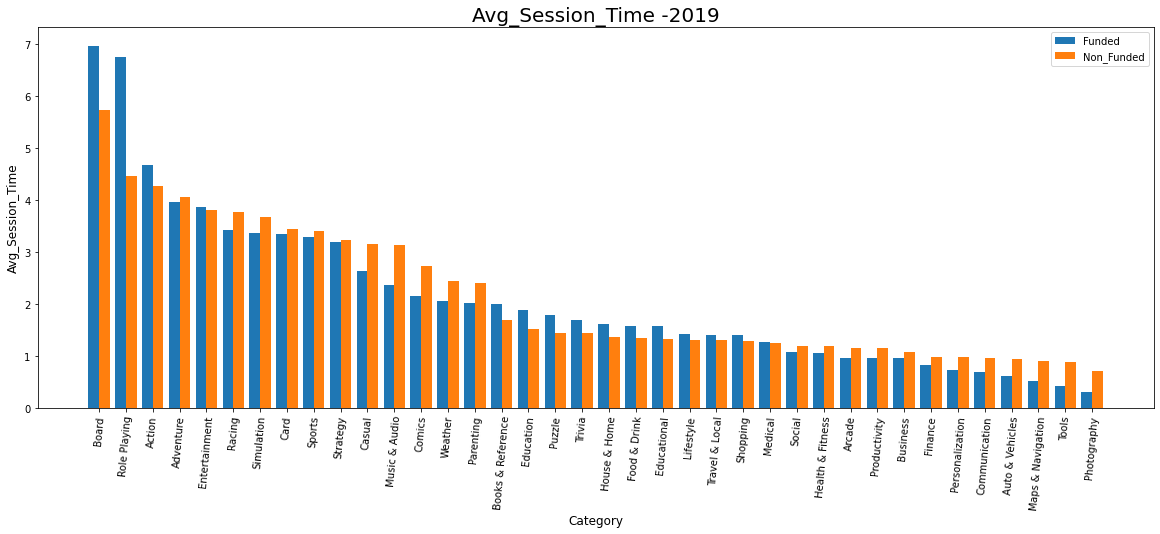

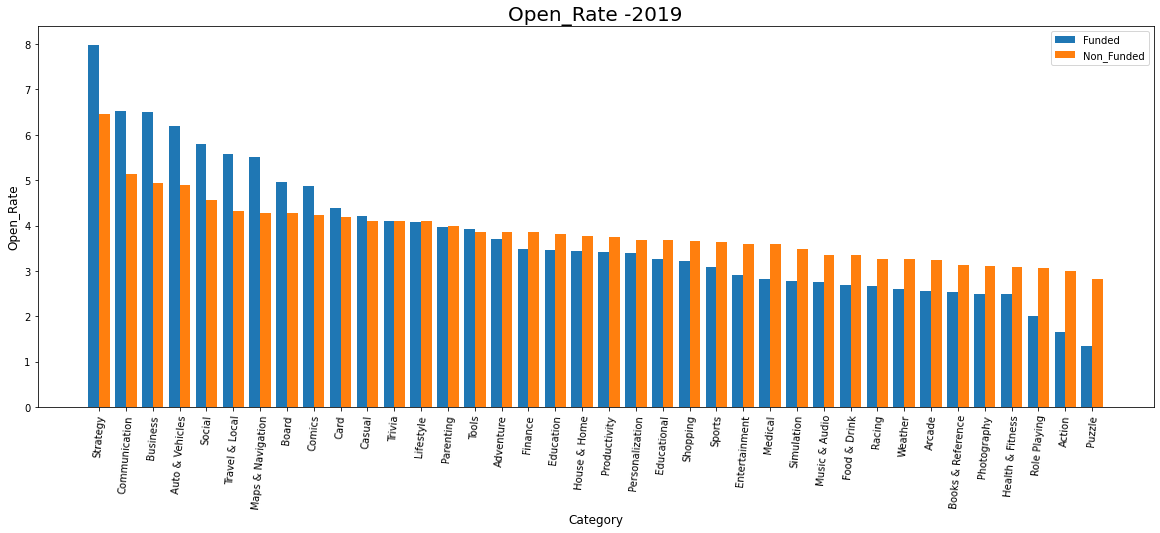

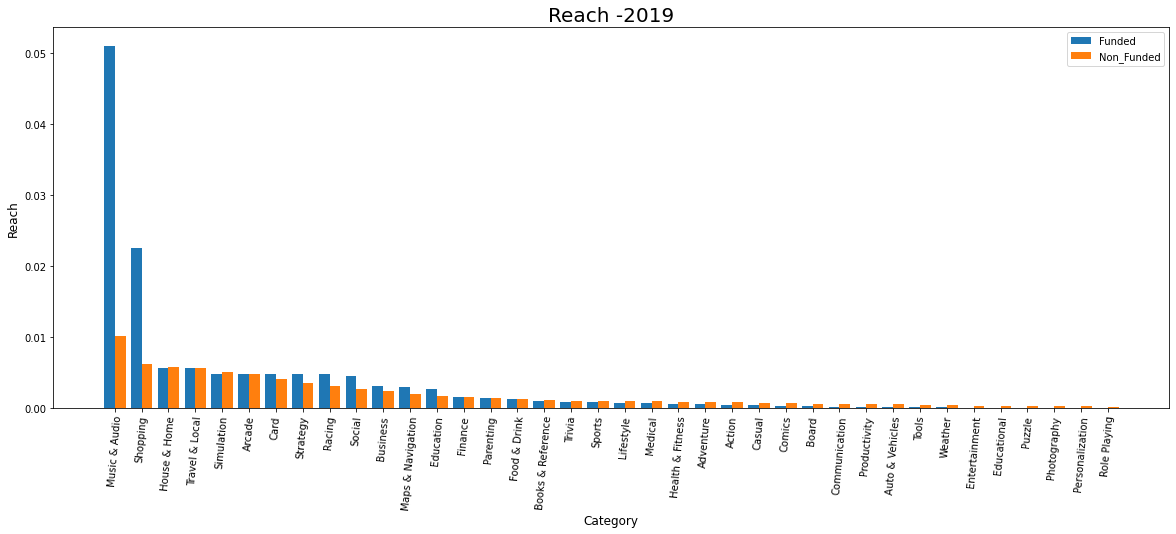

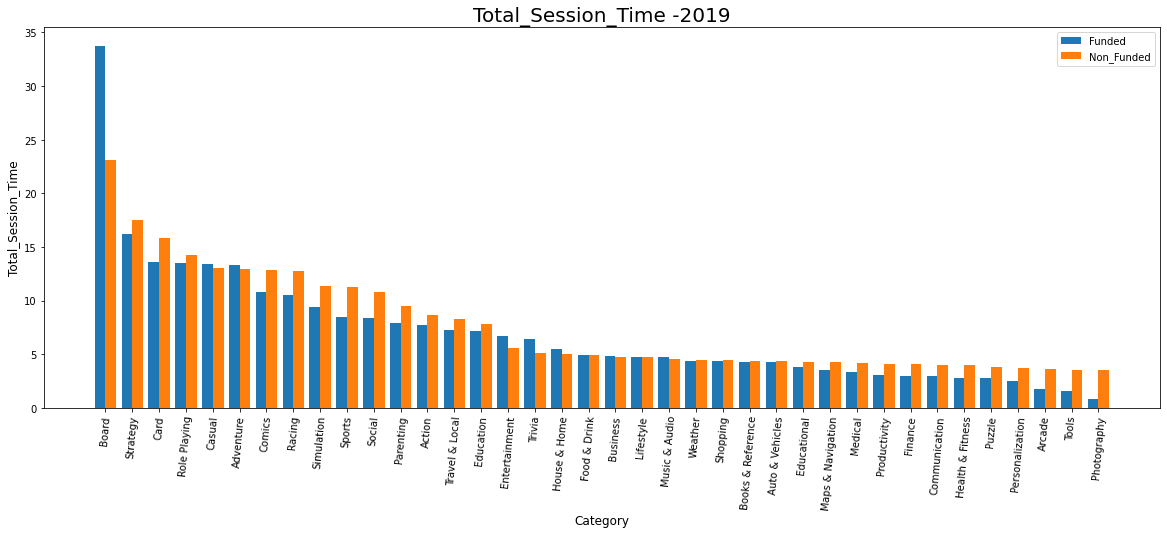

Not Funded in 2018 - ['Music', 'Sports', 'Communication', 'Strategy', 'Casino', 'Arcade', 'Productivity', 'Casual', 'Card', 'Word', 'Racing', 'Role Playing', 'Video Players & Editors', 'Entertainment', 'Simulation', 'Maps & Navigation', 'Personalization', 'Action', 'Trivia', 'Comics', 'Photography', 'Educational', 'Beauty', 'Auto & Vehicles', 'Art & Design', 'Board', 'Adventure', 'Events', 'Dating', 'Weather', 'Libraries & Demo']


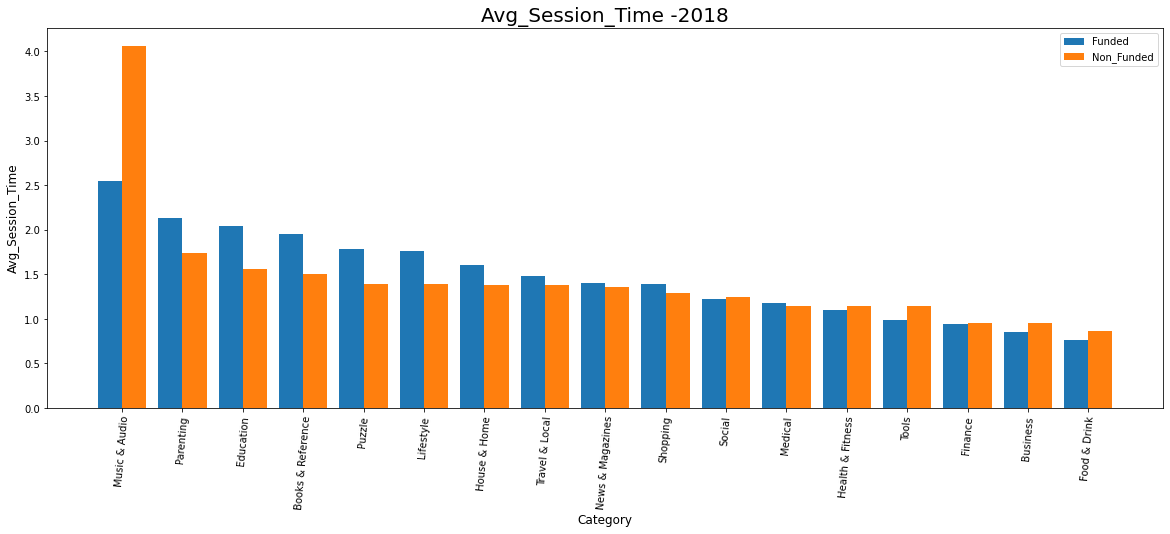

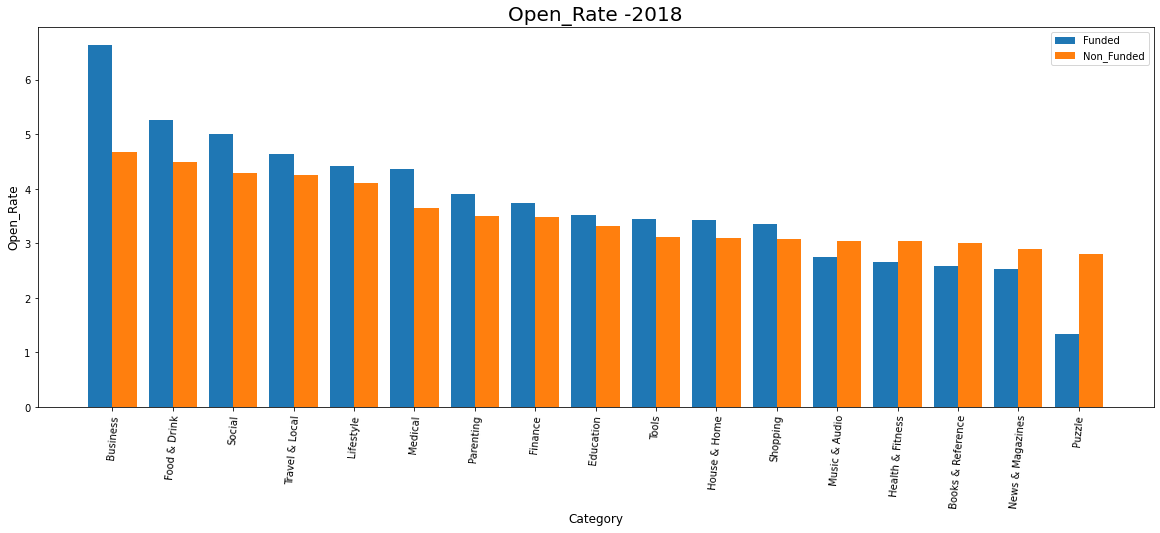

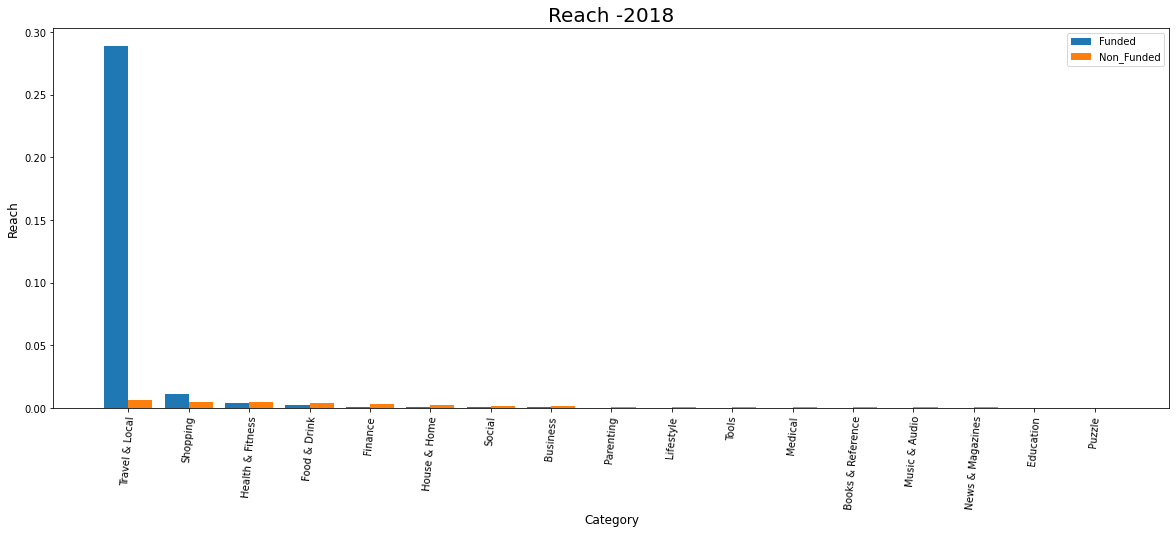

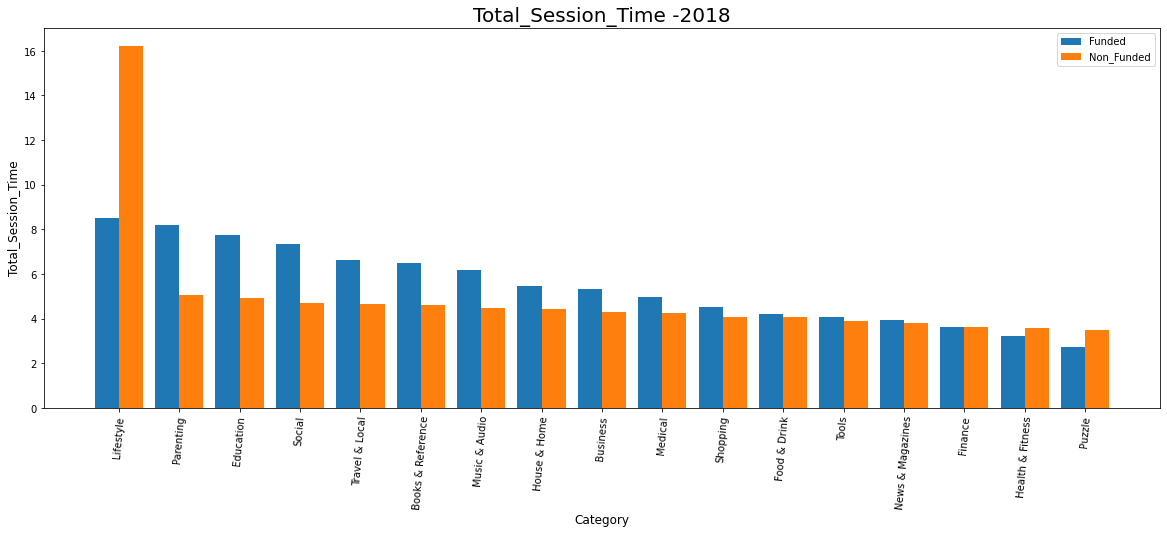

In [ ]:
# Trend for each category year wise
plt.rcParams['figure.figsize'] = (20, 7)

years = Funded_df['Year'].value_counts().index.to_list()
for j in years:
  a1 = Funded_df[Funded_df['Year']==j]
  a2 = Non_funded_df[Non_funded_df['Year']==j]
  not_funded = list(set(a2['Application Category'].value_counts().index.to_list()) - set(a1['Application Category'].value_counts().index.to_list()))
  print('Not Funded in '+str(j)+' -',not_funded)
  for i in numerical:
    w=0.4
    temp = pd.DataFrame(a1.groupby(['Application Category'])[i].mean())
    temp = temp.sort_values([i], ascending=False)
    temp2 = pd.DataFrame(a2.groupby(['Application Category'])[i].mean())
    temp2 = temp2.sort_values([i], ascending=False)
    for k in not_funded:
      temp2.drop(k, inplace = True)

    bar1 = np.arange(len(temp.index))
    bar2 = [i+w for i in bar1]

    plt.bar(bar1, temp[i], w, label = 'Funded' )
    plt.bar(bar2, temp2[i], w, label = 'Non_Funded' )

    plt.xlabel('Category', fontsize = 12)
    plt.xticks(bar1+w/2, temp.index, rotation=85)
    plt.ylabel(i, fontsize = 12)
    plt.title(i +' -'+ str(j), fontsize = 20)
    plt.legend()
    plt.show() 

In [ ]:
# Some UUID have multiple observations for same month, so will be taking mean of that in final dataset.
Funded_df[Funded_df['UUID']=='fd531f493d841c40301e4e0b234ebd2601b7c29d']

UUID     month  ...  Year  Month
2235  fd531f493d841c40301e4e0b234ebd2601b7c29d  20200601  ...  2020      6
2239  fd531f493d841c40301e4e0b234ebd2601b7c29d  20200501  ...  2020      5
2242  fd531f493d841c40301e4e0b234ebd2601b7c29d  20200401  ...  2020      4

[3 rows x 10 columns]

In [ ]:
Final_df.shape

(945184, 10)

In [ ]:
# Dropping about 30,000 observations of Category that were never funded.
for i in never_funded:
  Final_df.drop(Final_df[Final_df['Application Category']==i].index, inplace =True)

In [ ]:
Final_df.shape

(924071, 10)

In [ ]:
a = pd.DataFrame(Funded_df['Application Category'].value_counts())
a = a.sort_values(['Application Category'], ascending=False).head(5)
cat_5 = a.index.to_list()

In [ ]:
cat_5_df = pd.DataFrame(columns = Final_df.columns)
for i in cat_5:
  temp = Final_df[Final_df['Application Category']==i]
  cat_5_df = pd.concat([cat_5_df, temp])

In [ ]:
cat_5_df.shape

(259175, 10)

In [ ]:
def Previous_Data(column, dataframe):
  new_data = pd.DataFrame(columns = dataframe.columns)
  Unique_id = dataframe['UUID'].value_counts().index.to_list()

  for i in Unique_id:
    print(i)
    temp1 = dataframe[dataframe['UUID']==i]
    temp2 = dataframe[dataframe['UUID']==i][['UUID', 'month', column]]
    temp2 = temp2.sort_values(by=['month'])
    temp2.set_index(['UUID', 'month'], inplace = True)
    temp2 = pd.DataFrame(temp2[column].shift(+1))
    temp2.fillna(temp2.mean(), inplace = True)
    temp2.rename(columns={column:column+'_Prev1'}, inplace=True)
    temp2.reset_index(inplace=True)
    temp2.drop(['UUID'], axis = 1, inplace=True)
    new_df = pd.merge(temp1, temp2, on = 'month', how='left')
    new_data = pd.concat([new_data, new_df])
  return new_data

In [ ]:
for i in numerical:
  print(i)
  cat_5_df = Previous_Data(i, cat_5_df)

Streaming output truncated to the last 5000 lines.
ada2bb8cc93c5939d0f1144f77bb6a73758e052c
6c8ec5324ba5de4424928193963412eb44d60bef
cdd84f2cd305e21ced04945a7895f6994d2c28ae
f4fd0a0897c948e99d0289b60eb67730aad2750c
93739ec8d729d1d59a3ef668934f845eeb34fb9a
61fc9793eca8dfa681861883ca77ba8726e47c61
ee47635041662eb1e6cfaa3c486041eaecf1989d
5a27a4f4706f357dc1c07bca52ba393832dd2710
328034daa6e47e1980a2f10b5e2049342acebe89
f93e22d60ea824c0cd32a48c86dcc505802aab95
3b1bf8b7656e17720850738386affd55bc45b8df
0bd4e6152bedc75377fd0e8845b26f6bb5351878
0fed037aa1d8bace1c5bc3ec851ef25f9e578ba1
0bcc48c400ff06995cf58880a43661a9e1f127c9
9efcb9dc16d795137c56ee753c5ac538e7f7af75
e72952b06cb7fc4bd86c125d8ebcb51fa81703a5
75e925eac0eca36331a3a3f2d707ba68fb402e9f
d74292998814a27074c0fbb384bdcdf95aac5639
bde2cf6a89f1db97888477484c82d740894d9bd7
c35fddfb6b48bc9a82d88188a0afc44778f788b0
c9c929b41bcaedf16c45acd853155d00b613e2d0
0ddfcc6499555ec673ef0fd0a9b634b90e9ba807
fbde5bd70fa3b9a1a820fe00f37a5c2a2247440f
3a05fd

KeyboardInterrupt: ignored

In [ ]:
cat_5_df.to_csv(folder + 'cat_5_df.csv', index= False)

In [ ]:
cat_5_df

NameError: ignored

In [ ]:
Final_df['UUID'].value_counts().index.to_list()

145189

In [ ]:
temp1 = Final_df[Final_df['UUID']=='7dfc5be8e09477caf982fa639f9b50dd3ad70137']

In [ ]:
avg_Session = pd.DataFrame(temp1.groupby(['UUID','month'])['Avg_Session_Time'].mean())

In [ ]:
avg_Session = avg_Session.sort_values(by=['month'])

In [ ]:
avg_Session

Avg_Session_Time
UUID                                     month                     
7dfc5be8e09477caf982fa639f9b50dd3ad70137 20191101          7.000440
                                         20191201          1.759516
                                         20200101          2.650067
                                         20200201          4.701076
                                         20200301          1.105554
                                         20200401          2.977494
                                         20200501          1.799768
                                         20200601          2.659502

In [ ]:
Prev1_avg_Session = pd.DataFrame(avg_Session['Avg_Session_Time'].shift(+1))

In [ ]:
Prev1_avg_Session

Avg_Session_Time
UUID                                     month                     
7dfc5be8e09477caf982fa639f9b50dd3ad70137 20191101               NaN
                                         20191201          7.000440
                                         20200101          1.759516
                                         20200201          2.650067
                                         20200301          4.701076
                                         20200401          1.105554
                                         20200501          2.977494
                                         20200601          1.799768

In [ ]:
Prev1_avg_Session.fillna(Prev1_avg_Session.mean(), inplace = True)

In [ ]:
Prev1_avg_Session.rename(columns={'Avg_Session_Time':'Prev1_avg_session'}, inplace=True)

In [ ]:
Prev1_avg_Session

In [ ]:
Prev1_avg_Session.reset_index(inplace=True)

In [ ]:
Prev1_avg_Session

UUID     month  Prev1_avg_session
0  7dfc5be8e09477caf982fa639f9b50dd3ad70137  20191101           3.141988
1  7dfc5be8e09477caf982fa639f9b50dd3ad70137  20191201           7.000440
2  7dfc5be8e09477caf982fa639f9b50dd3ad70137  20200101           1.759516
3  7dfc5be8e09477caf982fa639f9b50dd3ad70137  20200201           2.650067
4  7dfc5be8e09477caf982fa639f9b50dd3ad70137  20200301           4.701076
5  7dfc5be8e09477caf982fa639f9b50dd3ad70137  20200401           1.105554
6  7dfc5be8e09477caf982fa639f9b50dd3ad70137  20200501           2.977494
7  7dfc5be8e09477caf982fa639f9b50dd3ad70137  20200601           1.799768

In [ ]:
Prev1_avg_Session.drop(['UUID'], axis = 1, inplace=True)

In [ ]:
Prev1_avg_Session

month  Prev1_avg_session
0  20191101           3.141988
1  20191201           7.000440
2  20200101           1.759516
3  20200201           2.650067
4  20200301           4.701076
5  20200401           1.105554
6  20200501           2.977494
7  20200601           1.799768

In [ ]:
temp1

In [ ]:
new_df = pd.merge(temp1, Prev1_avg_Session, on = 'month', how='left')

In [ ]:
n1_df = pd.DataFrame(columns=temp1.columns)

In [ ]:
n1_df

Empty DataFrame
Columns: [UUID, month, Application Category, Avg_Session_Time, Open_Rate, Reach, Total_Session_Time, funding_ind, Year, Month]
Index: []

In [ ]:
new_df.shape

(27, 11)

In [ ]:
abcdefg = pd.concat([n1_df, new_df])

In [ ]:
abcdefg.shape

(27, 11)

In [ ]:
temp1 = Final_df[Final_df['UUID']=='937d7c6eb4af7ea0caad34bb65631b93a200d17d']

In [ ]:
avg_Session = pd.DataFrame(temp1.groupby(['UUID','month'])['Avg_Session_Time'].mean())

In [ ]:
avg_Session = avg_Session.sort_values(by=['month'])

In [ ]:
avg_Session

Avg_Session_Time
UUID                                     month                     
937d7c6eb4af7ea0caad34bb65631b93a200d17d 20200301          2.081414

In [ ]:
Prev1_avg_Session = pd.DataFrame(avg_Session['Avg_Session_Time'].shift(+1))

In [ ]:
Prev1_avg_Session

Avg_Session_Time
UUID                                     month                     
937d7c6eb4af7ea0caad34bb65631b93a200d17d 20200301               NaN

In [ ]:
Prev1_avg_Session.fillna(Prev1_avg_Session.mean(), inplace = True)

In [ ]:
Prev1_avg_Session

Avg_Session_Time
UUID                                     month                     
937d7c6eb4af7ea0caad34bb65631b93a200d17d 20200301               NaN